## Network Slicing using Inteer Linear Programming Trial by Samyak Jhaveri for USC ISI Virtual Netowkr Embedding Problem

References:
- https://stackoverflow.com/questions/33168699/remove-rotation-effect-when-drawing-a-square-grid-of-mxm-nodes-in-networkx-using
- https://gis.stackexchange.com/questions/321356/how-to-create-a-weighted-square-lattice-as-well-as-a-weighted-network-graph
- https://stackoverflow.com/questions/69419142/how-to-make-a-networkx-grid-given-a-list-of-points-and-add-edge-weights
- https://stackoverflow.com/questions/13698352/storing-and-accessing-node-attributes-python-networkx


Trial 1 - Inspired from 'Diet Planning' example

## Importing and Installing necessary libraries and Frameworks

In [1]:
import dimod
from dimod import Integer, Binary
import networkx as nx
from matplotlib import pyplot as plt
import random

*Note*: <br>
- Taking CPU capacity as 50 arbitrarily and for a placeholder value for the sake of simplicity. 

## Generating Physical Substrate Network (SN) graphs and Virtual Network Request (VNR) graphs

### For Creating and Toying with initial code

In [2]:
# Creating Substrate Network (SN) graph
SN_graph = nx.Graph()
sn_node_attributes = {}
sn_edge_attributes = {}

edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (0, 3), (1, 3)]
SN_graph.add_edges_from(edges)

for node in SN_graph.nodes:
        sn_node_attributes[node] = {'cpu_capacity': (random.randint(1, 5)*10)}  # You can change the CPU capacity as needed

# Assign bandwidth capacities to edges
for u, v in SN_graph.edges:
        sn_edge_attributes[(u, v)] = {'bandwidth_capacity': 50}  # You can change the bandwidth capacity as needed
        
# Set node and edge attributes for the graph
nx.set_node_attributes(SN_graph, sn_node_attributes)
nx.set_edge_attributes(SN_graph, sn_edge_attributes)



In [3]:
# Creating Virtual Network Request (VNR) Graph 1
VNR1_graph = nx.Graph()
vnr1_node_attributes = {}
vnr1_edge_attributes = {}

edges = [(0, 1), (1, 2), (2, 0)]
VNR1_graph.add_edges_from(edges)

for node in VNR1_graph.nodes:
        vnr1_node_attributes[node] = {'cpu_demand': random.randint(1, 25)}  # You can change the CPU capacity as needed

# Assign Bandwidth demands to edges
for u, v in VNR1_graph.edges:
    vnr1_edge_attributes[(u, v)] = {'bandwidth_demand': random.randint(1, 25)} 


# Set node and edge attributes for the graph
nx.set_node_attributes(VNR1_graph, vnr1_node_attributes)
nx.set_edge_attributes(VNR1_graph, vnr1_edge_attributes)


In [4]:
# Creating Virtual Network Request (VNR) Graph 1
VNR2_graph = nx.Graph()
vnr2_node_attributes = {}
vnr2_edge_attributes = {}

edges = [(0, 1)]
VNR2_graph.add_edges_from(edges)

for node in VNR2_graph.nodes:
        vnr2_node_attributes[node] = {'cpu_demand': random.randint(1, 25)}  # You can change the CPU capacity as needed

# Assign Bandwidth demands to edges
for u, v in VNR2_graph.edges:
    vnr2_edge_attributes[(u, v)] = {'bandwidth_demand': random.randint(1, 25)} 


# Set node and edge attributes for the graph
nx.set_node_attributes(VNR2_graph, vnr2_node_attributes)
nx.set_edge_attributes(VNR2_graph, vnr2_edge_attributes)


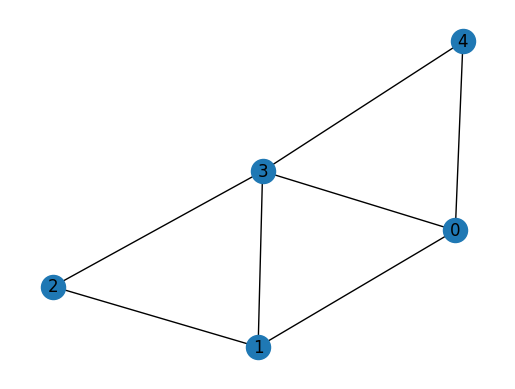

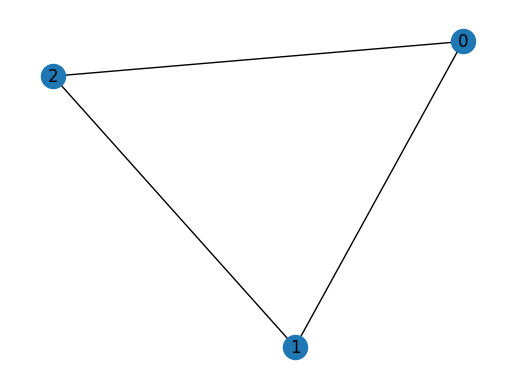

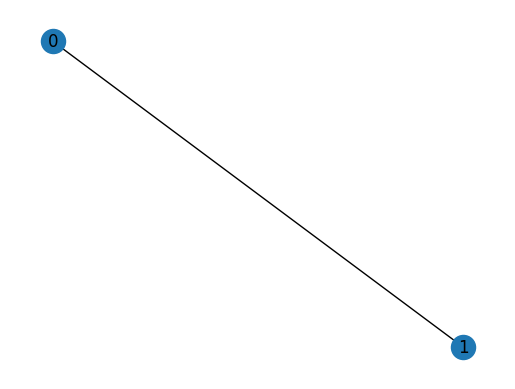

SN_node_attrributes:{0: 10, 1: 20, 2: 40, 3: 10, 4: 50}
SN_edge_attrributes:{(0, 1): 50, (0, 4): 50, (0, 3): 50, (1, 2): 50, (1, 3): 50, (2, 3): 50, (3, 4): 50}
VNR1_node_attrributes:{0: 17, 1: 19, 2: 5}
VNR1_edge_attrributes:{(0, 1): 9, (0, 2): 21, (1, 2): 21}
VNR2_node_attrributes:{0: 14, 1: 9}
VNR2_edge_attrributes:{(0, 1): 8}


In [26]:
nx.draw_networkx(SN_graph, with_labels=True)
plt.axis('off')
plt.show()

nx.draw_networkx(VNR1_graph, with_labels=True)
plt.axis('off')
plt.show()

nx.draw_networkx(VNR2_graph, with_labels=True)
plt.axis('off')
plt.show()


print("SN_node_attrributes:{}".format(nx.get_node_attributes(SN_graph, 'cpu_capacity')))
print("SN_edge_attrributes:{}".format(nx.get_edge_attributes(SN_graph, 'bandwidth_capacity')))


print("VNR1_node_attrributes:{}".format(nx.get_node_attributes(VNR1_graph, 'cpu_demand')))
print("VNR1_edge_attrributes:{}".format(nx.get_edge_attributes(VNR1_graph, 'bandwidth_demand')))


print("VNR2_node_attrributes:{}".format(nx.get_node_attributes(VNR2_graph, 'cpu_demand')))
print("VNR2_edge_attrributes:{}".format(nx.get_edge_attributes(VNR2_graph, 'bandwidth_demand')))

### For Testing and Benchmarking

In [5]:
def generate_physical_substrate_network(n1, n2):
    """
    Generates a lattice graph with `n` nodes to act as the Physical, Substrate Network. 
    This physical substrate network has values assoicated with its nodes - CPU capacities, 
    and weights associated with its edges - Bandwidth capacities. 
    the probability of an edge between two nodes if 0.6.
    """
    G = nx.grid_2d_graph(n1, n2)

    # Create dictionaries to store node and edge attributes
    node_attributes = {}
    edge_attributes = {}

    for node in G.nodes:
        node_attributes[node] = {'cpu_capacity': (random.randint(1, 5)*10)}  # You can change the CPU capacity as needed

    # Add diagonal edges and assign weights
    for i in range(n1 - 1):
        for j in range(n2 - 1):
            # G.add_edge((i, j), (i + 1, j + 1), weight=50)
            # G.add_edge((i + 1, j), (i, j + 1), weight=50)
            G.add_edge((i, j), (i + 1, j + 1))
            G.add_edge((i + 1, j), (i, j + 1))

    # Assign bandwidth capacities to edges
    for u, v in G.edges:
        edge_attributes[(u, v)] = {'bandwidth_capacity': 50}  # You can change the bandwidth capacity as needed
        
    # Set node and edge attributes for the graph
    nx.set_node_attributes(G, node_attributes)
    nx.set_edge_attributes(G, edge_attributes)

    # Establishing bandwidth capacity in the edges of the graph
    # for u, v in list(G.edges):
    #    G[u][v]['weight'] = 50
        
    return G


In [6]:
def generate_virtual_network_request_with_existing_edges(G, num_nodes):
    """
    Generates a smaller graph from the original graph `G`, ensuring connectivity with existing edges in the original graph.
    
    Args:
    G (nx.Graph): The original graph.
    num_nodes (int): The number of nodes to generate in the smaller graph.
    
    Returns:
    nx.Graph: The smaller graph with existing edges.
    """
    # Ensure that num_nodes is not greater than the number of nodes in the original graph.
    num_nodes = min(num_nodes, len(G.nodes()))
    
    # Create a list of nodes from the original graph.
    original_nodes = list(G.nodes())
    
    # Randomly select `num_nodes` nodes from the original graph.
    selected_nodes = random.sample(original_nodes, num_nodes)
    
    # Create a new graph for the smaller graph.
    smaller_graph = nx.Graph()
    
    # Add the selected nodes to the smaller graph.
    smaller_graph.add_nodes_from(selected_nodes)

    # Create dictionaries to store node and edge attributes
    smaller_graph_node_attributes = {}
    smaller_graph_edge_attributes = {}

    # Assign CPU demands to nodes
    for node in G.nodes:
        smaller_graph_node_attributes[node] = {'cpu_demand': random.randint(1, 25)}  

    
    # Iterate through the selected nodes and add edges to connect them if they are connected in the original graph.
    for i in range(len(selected_nodes)):
        for j in range(i + 1, len(selected_nodes)):
            if G.has_edge(selected_nodes[i], selected_nodes[j]):
                smaller_graph.add_edge(selected_nodes[i], selected_nodes[j])
    
    # Assign Bandwidth demands to edges
    for u, v in G.edges:
        smaller_graph_edge_attributes[(u, v)] = {'bandwidth_demand': random.randint(1, 25)}  
    
    # Set node and edge attributes for the graph
    nx.set_node_attributes(smaller_graph, smaller_graph_node_attributes)
    nx.set_edge_attributes(smaller_graph, smaller_graph_edge_attributes)

    return smaller_graph

Substrate Network Graph:[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


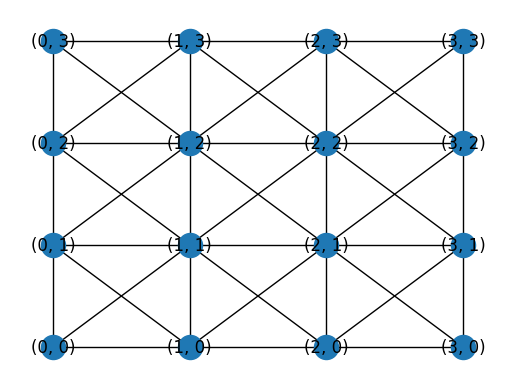

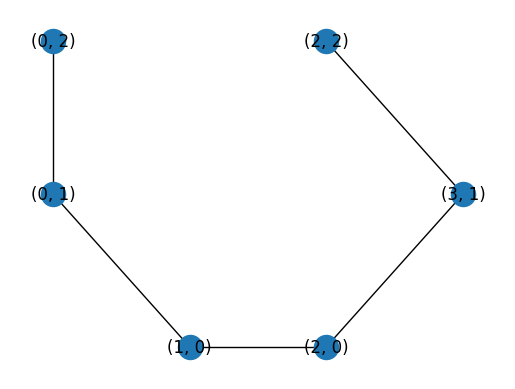

In [7]:
SN = generate_physical_substrate_network(4, 4)

pos = dict((n, n) for n in SN.nodes())
# label = dict(((i, j), 50) for i, j in G.nodes())
# labels = nx.get_edge_attributes(G, 'weight')

VNR = generate_virtual_network_request_with_existing_edges(SN, 6)  # Generate a smaller graph with 6 nodes

# Plotting the Larger Original, Substrate Network graph
# nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = labels)
# nx.draw_networkx(G, pos = pos, labels = label)  
nx.draw_networkx(SN, pos = pos, with_labels = True)  
print("Substrate Network Graph:{}".format(SN.nodes()))
plt.axis('off')
plt.show()

# Plot the Smaller, Derived Virtal Network Request graph
pos = dict((n, n) for n in VNR.nodes())
nx.draw_networkx(VNR, pos=pos, with_labels=True)
plt.axis('off')
plt.show()

In [6]:
SN_nodes = list(SN.nodes())
VNR_nodes = list(VNR.nodes())
print("Substrate Network Graph Nodes:{}".format(SN_nodes))
print("CPU Capacity of the Nodes of the Substrate Network Graph:{}".format(nx.get_node_attributes(SN, 'cpu_capacity')))
print("Bandwidth Capacity of the Edges of the Substrate Network Graph:{}".format(nx.get_edge_attributes(SN, 'bandwidth_capacity')))

print("Virtual Network Request Graph Nodes:{}".format(VNR_nodes))
print("CPU Demand of the Nodes of the VNR Graph:{}".format(nx.get_node_attributes(VNR, 'cpu_demand')))
print("Bandwidth Demand of the Edges of the VNR Graph:{}".format(nx.get_edge_attributes(VNR, 'bandwidth_demand')))


Substrate Network Graph Nodes:[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
CPU Capacity of the Nodes of the Substrate Network Graph:{(0, 0): 30, (0, 1): 40, (0, 2): 30, (0, 3): 30, (1, 0): 40, (1, 1): 50, (1, 2): 20, (1, 3): 50, (2, 0): 40, (2, 1): 10, (2, 2): 10, (2, 3): 20, (3, 0): 40, (3, 1): 30, (3, 2): 20, (3, 3): 40}
Bandwidth Capacity of the Edges of the Substrate Network Graph:{((0, 0), (1, 0)): 50, ((0, 0), (0, 1)): 50, ((0, 0), (1, 1)): 50, ((0, 1), (1, 1)): 50, ((0, 1), (0, 2)): 50, ((0, 1), (1, 0)): 50, ((0, 1), (1, 2)): 50, ((0, 2), (1, 2)): 50, ((0, 2), (0, 3)): 50, ((0, 2), (1, 1)): 50, ((0, 2), (1, 3)): 50, ((0, 3), (1, 3)): 50, ((0, 3), (1, 2)): 50, ((1, 0), (2, 0)): 50, ((1, 0), (1, 1)): 50, ((1, 0), (2, 1)): 50, ((1, 1), (2, 1)): 50, ((1, 1), (1, 2)): 50, ((1, 1), (2, 0)): 50, ((1, 1), (2, 2)): 50, ((1, 2), (2, 2)): 50, ((1, 2), (1, 3)): 50, ((1, 2), (2, 1)): 50, ((1, 2), (2, 3)): 50,

## Instantiate the CQM


In [5]:
cqm = dimod.ConstrainedQuadraticModel()

In [17]:
VNR1_node_attributes = nx.get_node_attributes(VNR1_graph, 'cpu_demand')
VNR1_edge_attributes = nx.get_edge_attributes(VNR1_graph, 'bandwidth_demand')
VNR2_node_attributes = nx.get_node_attributes(VNR2_graph, 'cpu_demand')
VNR2_edge_attributes = nx.get_edge_attributes(VNR2_graph, 'bandwidth_demand')
SN_node_attributes = nx.get_node_attributes(SN_graph, 'cpu_capacity')
SN_edge_attributes = nx.get_edge_attributes(SN_graph, 'bandwidth_capacity')
print(VNR1_node_attributes)

{0: 12, 1: 20, 2: 18}


## Add BINARY Decision Variable $x$ over which the optimization shall be performed for nodes, and $y$ for edges. 
$x^{u}_{ik}$ is a Binary decision variable such that it takes the value 1 if node $n^{s}_{ik}$ of request $vnr_{k}$ is mapped top node $n^{I}_{u}$ of the SN, 0 otherwise. <br>
And, <br>
$y^{uv}_{ijk}$, takes the value 1 is the link $e^{S}_{ijk}$ of requet $VNR_{k}$ is mapped through the physical link $e^{I}_{uv}$ os SN, and 0 otherwise

In [7]:
# cqm.add_variable(dimod.BINARY, 'x') # len(SN_nodes), dimod.BINARY) variable for node mapping 
xs = {vnr_node: Binary(sn_node) for vnr_node in VNR1_graph.nodes() for sn_node in SN_graph.nodes()}
# (wrong) xs = {vnr_node: sn_node for vnr_node, sn_node in zip(VNR1_graph.nodes(), SN_graph.nodes())} --> xs:{0: 0, 1: 1, 2: 2}
xs = {x[sn_node][]}

print("xs:{}".format(xs))
`tl` comes from cytoolz.concat
"""
x = [[f'x{i}_{j}' for j in range(n)] for i in range(n)]
cqm.add_variables(BINARY, tl.concat(x))
"""

xs:{0: BinaryQuadraticModel({4: 1.0}, {}, 0.0, 'BINARY'), 1: BinaryQuadraticModel({4: 1.0}, {}, 0.0, 'BINARY'), 2: BinaryQuadraticModel({4: 1.0}, {}, 0.0, 'BINARY')}


In [8]:
cqm.add_variable(dimod.BINARY, 'x') # len(SN_nodes), dimod.BINARY) variable for Edge mapping

'x'

## Defining CPU Cost Expression 

In [9]:
cpu_cost = 0
for vnr_node in VNR1_node_attributes:
    coeff = VNR1_node_attributes[vnr_node] * xs[vnr_node] # CPU cost for node mapping
    cpu_cost = cpu_cost + coeff

## Adding constraints

In [10]:
def total_cpu(node_cpu_dict):
    return sum(list(node_cpu_dict.values()))

### Constraint 1: Total VNR Graph CPU demand (of all the nodes combined) <= Total SN Graph CPU Capacity (of all nodes combined)

the first constraints has to be a sum of the binary decision variables of the vnr node, and the sum of them should be 1. se `add_discrete` which does exactl ythat in the CQM. 

In [11]:
# Adding Constraint 1: total VNR node cpu demand <= total sn node cpu resources
cqm.add_constraint(total_cpu(VNR1_node_attributes) <= total_cpu(SN_node_attributes), label='c1.1') 
# cqm.add_constraint(total_cpu(VNR2_node_attributes) <= total_cpu(SN_node_attributes), label='c1.2') 

TypeError: unexpected data format

### Constraint 2: A node of VNR Graph is mapped to a node of SN Graph such thath the CPU demand of theVNR node is less than the CPU capacity of the SN node

In [16]:
for sn_node in SN_node_attributes:
    cqm.add_constraint(sum(VNR1_node_attributes[vnr_node] * xs[vnr_node])    <= sn_node.value() for )

for vnr_node in VNR1_node_attributes:
    cqm.add_constraint((VNR1_node_attributes[vnr_node] * xs[vnr_node]) <= SN1_node_attributes.values(), label='c2') # Constraint 2: VNR node cpu demand <= sn node cpu resources
"""
for vnr_node_attribute in VNR1_node_attributes.values():
    cqm.add_constraint((vnr_node_attribute * xs[vnr_node_attribute]) <= SN1_node_attributes.values(), label='c2') # Constraint 2: VNR node cpu demand <= sn node cpu resources
"""

TypeError: unsupported operand type(s) for *: 'int' and 'dict'

## Set the Objective (for one VNR bveing mapped onto a SN, will add in the objective function for multiple VNRs onto a SN later)

In [10]:
VNR_node_attributes = nx.get_node_attributes(VNR, 'cpu_demand')
SN_node_attributes = nx.get_node_attributes(SN, 'cpu_capacity')
print(VNR_node_attributes)
print("SN_node_attributes:{}".format(list(SN_node_attributes.values())))

{(0, 1): 10, (2, 2): 21, (0, 2): 12, (2, 1): 9, (2, 0): 1, (0, 3): 10}
SN_node_attributes:[30, 40, 30, 30, 40, 50, 20, 50, 40, 10, 10, 20, 40, 30, 20, 40]


In [ ]:
# Adding Constraint 2: any VRN nodecan be mapped to a SN node with only hgiher cpu resoerce availablility

Define the variable for mapping nodes in the VNR to nodes in the SN
Each variable represnts whether a VNR node is mapped to a SN node or not

In [8]:
# x = {f'x_{vnr_node}_{sn_node}': dimod.BINARY for vnr_node in VNR_nodes for sn_node in SN_nodes}
# x = {cost: dimod.BINARY for cost in list(VNR_node_attributes.values())}
x = {cost: Integer("%d" %cost, lower_bound=0, upper_bound=1) for cost in VNR_node_attributes.values()}

# alternative variable creation, alternative to `x`
# y = {cost: Binary("Y[%d]" %cost) for cost in VNR_node_attributes.values()}
y = {cost: dimod.BINARY for cost in VNR_node_attributes.values()}
# y = {f'x_{vnr_node}_{sn_node}': Binary("Y[%d]" %cost) for vnr_node in VNR_nodes for sn_node in SN_nodes for cost in VNR_node_attributes.values()}


In [29]:
print(x)
print("type(x):{}".format(type(x)))
print(y)
print("type(y):{}".format(type(y)))


{6: QuadraticModel({'6': 1.0}, {}, 0.0, {'6': 'INTEGER'}, dtype='float64'), 8: QuadraticModel({'8': 1.0}, {}, 0.0, {'8': 'INTEGER'}, dtype='float64'), 23: QuadraticModel({'23': 1.0}, {}, 0.0, {'23': 'INTEGER'}, dtype='float64'), 22: QuadraticModel({'22': 1.0}, {}, 0.0, {'22': 'INTEGER'}, dtype='float64')}
type(x):<class 'dict'>
{6: <Vartype.BINARY: frozenset({0, 1})>, 8: <Vartype.BINARY: frozenset({0, 1})>, 23: <Vartype.BINARY: frozenset({0, 1})>, 22: <Vartype.BINARY: frozenset({0, 1})>}
type(y):<class 'dict'>


In [30]:
print("x.keys():{}".format(x.keys()))
print("x.values():{}".format(x.values()))

print("y.keys():{}".format(y.keys()))
print("y.values():{}".format(y.values()))


x.keys():dict_keys([6, 8, 23, 22])
x.values():dict_values([QuadraticModel({'6': 1.0}, {}, 0.0, {'6': 'INTEGER'}, dtype='float64'), QuadraticModel({'8': 1.0}, {}, 0.0, {'8': 'INTEGER'}, dtype='float64'), QuadraticModel({'23': 1.0}, {}, 0.0, {'23': 'INTEGER'}, dtype='float64'), QuadraticModel({'22': 1.0}, {}, 0.0, {'22': 'INTEGER'}, dtype='float64')])
y.keys():dict_keys([6, 8, 23, 22])
y.values():dict_values([<Vartype.BINARY: frozenset({0, 1})>, <Vartype.BINARY: frozenset({0, 1})>, <Vartype.BINARY: frozenset({0, 1})>, <Vartype.BINARY: frozenset({0, 1})>])


In [11]:
print(cqm.variables)

Variables()


In [27]:
for vnr_node in VNR_nodes:
    print(VNR_node_attributes[vnr_node])
print(VNR_nodes)

for vnr_node in VNR_nodes:
    for sn_node in SN_nodes:
        print(x[f'x_{vnr_node}_{sn_node}'] )

6
6
8
23
22
8
[(1, 0), (3, 1), (1, 1), (2, 0), (1, 3), (0, 2)]


KeyError: 'x_(1, 0)_(0, 0)'

In [13]:
# Define the Objective Function 
# The objective function is the sum of the costs of all the nodes in the VNR graph
for vnr_node in VNR_nodes:
    for sn_node in SN_nodes:
        objective = sum(VNR_node_attributes[vnr_node] * x[f'x_{vnr_node}_{sn_node}'])
# objective = sum(VNR_node_attributes[vnr_node] * x[(vnr_node, sn_node)]
#                for vnr_node in VNR_nodes
#                for sn_node in SN_nodes)



KeyError: 'x_(1, 0)_(0, 0)'

In [19]:
# Define the Constraints
# Constraint 1: Each VNR node is mapped to only one SN node
# cqm.add_constraint(sum())

# for vnr_node in VNR_nodes:
#    cqm.add_constraint(sum(x[(vnr_node, sn_node)] for sn_node in SN_nodes) == 1, label=f'c1_{vnr_node}')
  


In [20]:
# Constraint 2: The CPU demand of the VNR node is less than the CPU capacity of the SN node
for vnr_node in VNR_nodes:
    for sn_node in SN_nodes:
        cqm.add_constraint(sum(x[cost] for cost in list(VNR_node_attributes.values()))) <= SN_node_attributes[sn_node], label=f'c2_{vnr_node}_{sn_node}'

for vnr_node in VNR_nodes:
    for sn_node in SN_nodes:
        cqm.add_constraint(VNR_node_attributes[vnr_node] * x[(vnr_node, sn_node)] <= SN_node_attributes[sn_node], label=f'c2_{vnr_node}_{sn_node}')


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1390279659.py, line 4)

In [21]:

# Constraint 3: The Bandwidth demand of the VNR edge is less than the Bandwidth capacity of the SN edge
VNR_edge_attributes = nx.get_edge_attributes(VNR, 'bandwidth_demand')
SN_edge_attributes = nx.get_edge_attributes(SN, 'bandwidth_capacity')

for vnr_edge in VNR.edges:
    for sn_edge in SN.edges:
        cqm.add_constraint(VNR_edge_attributes[vnr_edge] * x[(vnr_edge, sn_edge)] <= SN_edge_attributes[sn_edge], label=f'c3_{vnr_edge}_{sn_edge}')


KeyError: (((0, 0), (1, 0)), ((0, 0), (1, 0)))

KeyError: 'x_(0, 0)_(0, 0)'

In [ ]:
# Write the Objective Function to the Constrained Quadratic Model to solve the problem of mapping vnr nodes onto sn nodes such that all vnr nodes are mapped to only one sn node and the cpu_demand for the vnr node is less than the cpu_capacity of the sn node, while minimizing the cost of mapping the vnr nodes onto the sn nodes.
cqm.set_objective(objective)








In [ ]:

# Print the Constrained Quadratic Model
print(cqm)

In [ ]:

# Solve the Constrained Quadratic Model
sampler = dimod.ExactSolver()
solution = sampler.sample_cqm(cqm)
